<a href="https://colab.research.google.com/github/lathamithu/Cereal_Rating/blob/main/CEREAL_RATING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [228]:
import pandas as pd
import numpy as np

In [229]:
df=pd.read_csv('https://rb.gy/ktivhd')

In [230]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [231]:
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [232]:
df.shape

(77, 16)

In [233]:
data = df.drop(['name'], axis = 1)

In [234]:
# set() avoids repetition and shows unique values

print(set(data['shelf']))

{1, 2, 3}


In [235]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [236]:
x = data.iloc[:,:-1].values   #independent variables
y = data.iloc[:,-1].values    #dependent variable

In [237]:
data.isnull().sum()   #no missing values

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [238]:
for i in range(2):
  x[:,i] = le.fit_transform(x[:,i])

x

array([[3, 0, 70, ..., 3, 1.0, 0.33],
       [5, 0, 120, ..., 3, 1.0, 1.0],
       [2, 0, 70, ..., 3, 1.0, 0.33],
       ...,
       [6, 0, 100, ..., 1, 1.0, 0.67],
       [1, 0, 100, ..., 1, 1.0, 1.0],
       [1, 0, 110, ..., 1, 1.0, 0.75]], dtype=object)

*3 METHODS OF CORRELATION CALCULATION :*

>   1) Pearson - calculation depends on mean; used for no outliers

>  2) Kendall

> 3) Spearman







In [239]:
from scipy.stats import pearsonr

In [240]:
correlation = []
for i in range(len(data.columns)-1):
  col_x = x[:,i]
  col_y = y
  corr,_ = pearsonr(col_x, col_y)
  correlation.append(corr)
  print(corr)

0.1409424083755429
0.20302370742156076
-0.6893760311652588
0.47061846454925926
-0.40928366014780976
-0.40129520449484846
0.5841604199515842
0.0520546612337646
-0.7596746584301075
0.38016536869410067
-0.24054361076908157
0.025158815679116875
-0.2981239849779472
-0.20316006300817877


In [241]:
correlation

[0.1409424083755429,
 0.20302370742156076,
 -0.6893760311652588,
 0.47061846454925926,
 -0.40928366014780976,
 -0.40129520449484846,
 0.5841604199515842,
 0.0520546612337646,
 -0.7596746584301075,
 0.38016536869410067,
 -0.24054361076908157,
 0.025158815679116875,
 -0.2981239849779472,
 -0.20316006300817877]

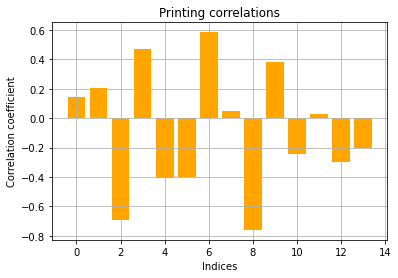

In [242]:
#visualizing and studying the correlations
import matplotlib.pyplot as plt

plt.title('Printing correlations')
plt.bar([i for i in range(14)], correlation, color = 'orange')
plt.xlabel('Indices')
plt.ylabel('Correlation coefficient')
plt.grid()

In [243]:
#recording the index of those columns who have a correlation coefficient falling under the mentioned criteria

index = []
for i in range(14):
  if correlation[i] <= 0.29 and correlation[i] >= -0.29:
    index.append(i)
    #print(i)
index

[0, 1, 7, 10, 11, 13]

In [244]:
drop_col = []
for i in index:
  data.columns[i]
  #print(data.columns[i])
  drop_col.append(data.columns[i])
drop_col

['mfr', 'type', 'carbo', 'vitamins', 'shelf', 'cups']

In [245]:
data = data.drop(drop_col, axis = 1)
data.head()

,calories,protein,fat,sodium,fiber,sugars,potass,weight,rating
0,70,4,1,130,10.0,6,280,1.0,68.402973
1,120,3,5,15,2.0,8,135,1.0,33.983679
2,70,4,1,260,9.0,5,320,1.0,59.425505
3,50,4,0,140,14.0,0,330,1.0,93.704912
4,110,2,2,200,1.0,8,-1,1.0,34.384843


In [246]:
x = data.iloc[:,:-1].values
x

array([[ 70.  ,   4.  ,   1.  , 130.  ,  10.  ,   6.  , 280.  ,   1.  ],
       [120.  ,   3.  ,   5.  ,  15.  ,   2.  ,   8.  , 135.  ,   1.  ],
       [ 70.  ,   4.  ,   1.  , 260.  ,   9.  ,   5.  , 320.  ,   1.  ],
       [ 50.  ,   4.  ,   0.  , 140.  ,  14.  ,   0.  , 330.  ,   1.  ],
       [110.  ,   2.  ,   2.  , 200.  ,   1.  ,   8.  ,  -1.  ,   1.  ],
       [110.  ,   2.  ,   2.  , 180.  ,   1.5 ,  10.  ,  70.  ,   1.  ],
       [110.  ,   2.  ,   0.  , 125.  ,   1.  ,  14.  ,  30.  ,   1.  ],
       [130.  ,   3.  ,   2.  , 210.  ,   2.  ,   8.  , 100.  ,   1.33],
       [ 90.  ,   2.  ,   1.  , 200.  ,   4.  ,   6.  , 125.  ,   1.  ],
       [ 90.  ,   3.  ,   0.  , 210.  ,   5.  ,   5.  , 190.  ,   1.  ],
       [120.  ,   1.  ,   2.  , 220.  ,   0.  ,  12.  ,  35.  ,   1.  ],
       [110.  ,   6.  ,   2.  , 290.  ,   2.  ,   1.  , 105.  ,   1.  ],
       [120.  ,   1.  ,   3.  , 210.  ,   0.  ,   9.  ,  45.  ,   1.  ],
       [110.  ,   3.  ,   2.  , 140.  ,   2.  ,   7

In [247]:
#splitting into test and train set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [248]:
#fitting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [249]:
regressor.score(x_test, y_test)  #no regularization

0.9886767383801109

In [250]:
y_pred = regressor.predict(x_test)

In [251]:
#regularizing the linear model
from sklearn.linear_model import Ridge
ridge_reg_1 = Ridge(alpha = 1, normalize = True)
ridge_reg_1.fit(x_train, y_train)
ridge_reg_1.score(x_test, y_test)  #alpha = 1

0.8440065902059363

In [252]:
ridge_reg_05 = Ridge(alpha = 0.5, normalize = True)
ridge_reg_05.fit(x_train, y_train)
ridge_reg_05.score(x_test, y_test)  #alpha = 0.5

0.9137476660610283

In [253]:
ridge_reg_2 = Ridge(alpha = 2, normalize = True)
ridge_reg_2.fit(x_train, y_train)
ridge_reg_2.score(x_test, y_test)  #alpha = 2

0.7205085716430704